# Fulton County Data Exploratory Data Analysis

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib as plot

pd.set_option('display.max_columns', 150)
pd.options.display.float_format = '{:.2f}'.format

### ! All plotting was done using Fulton 2020 data that was already geocoded. I simply matched coorinated with their Parcel IDs from this dataset. This method could have skewed results but I believe all results are an accurate estimation.


## CMR

In [2]:
cmr2011 = pd.read_excel('../data/cmr/cmr2011.xlsx')

In [3]:
cmr2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66525 entries, 0 to 66524
Data columns (total 76 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Taxyr           66524 non-null  float64
 1   Parid           66525 non-null  object 
 2   Card            54853 non-null  float64
 3   Ofcard          66456 non-null  float64
 4   Nbhd            66524 non-null  object 
 5   SITUS Adrpre    0 non-null      float64
 6   SITUS Adrno     66442 non-null  float64
 7   SITUS Adrdir    136 non-null    object 
 8   SITUS Adrstr    66522 non-null  object 
 9   SITUS Adrsuf    65010 non-null  object 
 10  SITUS Adrsuf2   35030 non-null  object 
 11  SITUS Cityname  64962 non-null  object 
 12  Class           66524 non-null  object 
 13  Luc             66510 non-null  object 
 14  Livunit         58227 non-null  float64
 15  Calcacres       62904 non-null  float64
 16  Chgrsn          58311 non-null  object 
 17  Taxdist         66524 non-null 

No complete row duplicates

In [4]:
sum(cmr2011.duplicated())

0

Many duplicates for Parid key.

### Are there many parcels with multiple buildings, with each being recorded on a separate row?

In [5]:
dup = sum(cmr2011.duplicated(subset=['Parid'], keep='first'))
print("Total duplicates for Parid: ", dup)
print("Percent: ", dup / len(cmr2011) * 100)

Total duplicates for Parid:  37953
Percent:  57.05073280721533


In [6]:
cmr2011.head(5)

,Taxyr,Parid,Card,Ofcard,Nbhd,SITUS Adrpre,SITUS Adrno,SITUS Adrdir,SITUS Adrstr,SITUS Adrsuf,SITUS Adrsuf2,SITUS Cityname,Class,Luc,Livunit,Calcacres,Chgrsn,Taxdist,Own1,Own2,Careof,OWNER Adrno,OWNER Adrdir,OWNER Adrstr,OWNER Adrsuf,OWNER Adrsuf2,OWNER Cityname,Statecode,Country,Unitdesc,Unitno,Zip1,Zip2,Reascd,Spcflg,Aprland,Aprbldg,Revcode,Revreas,Revland,Revbldg,Revtot,Aprtot,Exmppct,Exmpval,Cur,Areasum,Bldnum,Yrblt,Effyr,Units,Structure,Grade,Pctcomp,Parkcover,Parkuncov,Areasum.1,Cdu,Card.1,Lline,Area,Perim,Stories,Sf,Usetype,Wallhgt,Extwall,Constr,Intfin,Intwall,Yrblt.1,Effyr.1,Rentpct,Rentsf,Occupancy,Msunits
0,2011.00,06 0313 LL0034,NaN,1.00,C207,NaN,0.00,NaN,ROCK BRIDGE,RD,NaN,SANDY SPRINGS,E1,699,0.00,1.02,NaN,59,DEKALB COUNTY,NaN,NaN,NaN,NaN,P.O. BOX 100004,NaN,NaN,DECATUR,GA,NaN,NaN,NaN,30031,7004,NaN,NaN,1029100.00,0.00,NaN,NaN,NaN,NaN,NaN,1029100.00,NaN,0.00,Y,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011.00,06 0313 LL0075,1.00,1.00,C207,NaN,7800.00,NaN,SPALDING,DR,NaN,SANDY SPRINGS,C3,348,0.00,0.83,MN,59,SAM'S REAL ESTATE HOLDINGS GEORGIA LLC,NaN,C/O EQUIVA SERVICES LLC,6407.00,NaN,IDLEWILD,RD,NaN,CHARLOTTE,NC,NaN,SUITE,204,28212,NaN,NaN,NaN,1016900.00,362500.00,1.00,20,1130300.00,248700.00,1379000.00,1379400.00,NaN,0.00,Y,2938.00,1,1996.00,NaN,0.00,348.00,C+,NaN,NaN,NaN,2938.00,NaN,1.00,1.00,2938.00,219.00,1.00,2938.00,38.00,12.00,8.00,2.00,100.00,2.00,NaN,NaN,100.00,2938.00,NaN,NaN
2,2011.00,06 0313 LL0091,1.00,4.00,C207,NaN,7700.00,NaN,SPALDING,DR,NaN,SANDY SPRINGS,C4,344,0.00,8.63,MN,59,SELIG ENTERPRISES INC,NaN,NaN,1100.00,NaN,SPRING,ST,NW,ATLANTA,GA,NaN,NaN,#550,30309,2848,E1,NaN,5079100.00,2100400.00,3.00,OVR,5079100.00,2100400.00,7179500.00,7179500.00,NaN,0.00,Y,70645.00,1,1980.00,NaN,0.00,344.00,C+,NaN,NaN,NaN,47445.00,NaN,1.00,1.00,18500.00,570.00,1.00,18500.00,34.00,14.00,4.00,2.00,100.00,2.00,NaN,NaN,100.00,18500.00,NaN,NaN
3,2011.00,06 0313 LL0091,1.00,4.00,C207,NaN,7700.00,NaN,SPALDING,DR,NaN,SANDY SPRINGS,C4,344,0.00,8.63,MN,59,SELIG ENTERPRISES INC,NaN,NaN,1100.00,NaN,SPRING,ST,NW,ATLANTA,GA,NaN,NaN,#550,30309,2848,E1,NaN,5079100.00,2100400.00,3.00,OVR,5079100.00,2100400.00,7179500.00,7179500.00,NaN,0.00,Y,70645.00,1,1980.00,NaN,0.00,344.00,C+,NaN,NaN,NaN,47445.00,NaN,1.00,4.00,28945.00,706.00,1.00,28945.00,34.00,16.00,4.00,2.00,100.00,2.00,NaN,NaN,100.00,28945.00,NaN,NaN
4,2011.00,06 0313 LL0091,2.00,4.00,C207,NaN,7700.00,NaN,SPALDING,DR,NaN,SANDY SPRINGS,C4,344,0.00,8.63,MN,59,SELIG ENTERPRISES INC,NaN,NaN,1100.00,NaN,SPRING,ST,NW,ATLANTA,GA,NaN,NaN,#550,30309,2848,E1,NaN,5079100.00,2100400.00,3.00,OVR,5079100.00,2100400.00,7179500.00,7179500.00,NaN,0.00,Y,70645.00,2,1980.00,NaN,1.00,344.00,C+,NaN,NaN,NaN,9300.00,NaN,2.00,1.00,9300.00,430.00,1.00,9300.00,34.00,14.00,4.00,2.00,100.00,2.00,NaN,NaN,100.00,9300.00,NaN,NaN


In [7]:
cmr2011[cmr2011['Parid'] == '06 0313  LL0034']

,Taxyr,Parid,Card,Ofcard,Nbhd,SITUS Adrpre,SITUS Adrno,SITUS Adrdir,SITUS Adrstr,SITUS Adrsuf,SITUS Adrsuf2,SITUS Cityname,Class,Luc,Livunit,Calcacres,Chgrsn,Taxdist,Own1,Own2,Careof,OWNER Adrno,OWNER Adrdir,OWNER Adrstr,OWNER Adrsuf,OWNER Adrsuf2,OWNER Cityname,Statecode,Country,Unitdesc,Unitno,Zip1,Zip2,Reascd,Spcflg,Aprland,Aprbldg,Revcode,Revreas,Revland,Revbldg,Revtot,Aprtot,Exmppct,Exmpval,Cur,Areasum,Bldnum,Yrblt,Effyr,Units,Structure,Grade,Pctcomp,Parkcover,Parkuncov,Areasum.1,Cdu,Card.1,Lline,Area,Perim,Stories,Sf,Usetype,Wallhgt,Extwall,Constr,Intfin,Intwall,Yrblt.1,Effyr.1,Rentpct,Rentsf,Occupancy,Msunits
0,2011.00,06 0313 LL0034,NaN,1.00,C207,NaN,0.00,NaN,ROCK BRIDGE,RD,NaN,SANDY SPRINGS,E1,699,0.00,1.02,NaN,59,DEKALB COUNTY,NaN,NaN,NaN,NaN,P.O. BOX 100004,NaN,NaN,DECATUR,GA,NaN,NaN,NaN,30031,7004,NaN,NaN,1029100.00,0.00,NaN,NaN,NaN,NaN,NaN,1029100.00,NaN,0.00,Y,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


How many duplicate Parid are explained by buildings on one parcel (e.g. do they have multiple Bldnum recorded)?  
Note: estimation, potentially not exact

In [8]:
dup = sum(cmr2011.duplicated(subset=['Parid', 'Bldnum'], keep='first'))
print("Total duplicates for Parid, Bldnum: ", dup)
print('---')
init = sum(cmr2011.duplicated(subset=['Parid'], keep='first'))
print('Num duplicates explained by Bldnum: ', init - dup)
print('Percent of initial duplicates accounted for: ', (init - dup) / init * 100)
print("Percent of data duplicated: ", dup / len(cmr2011) * 100)

Total duplicates for Parid, Bldnum:  29401
---
Num duplicates explained by Bldnum:  8552
Percent of initial duplicates accounted for:  22.533133085658577
Percent of data duplicated:  44.19541525742202


In [9]:
dup = sum(cmr2011.groupby('Parid')['Bldnum'].first() != cmr2011.groupby('Parid')['Bldnum'].last())
print("Number of Parids where Bldnum is different: ", dup)
print("Percent: ", dup / len(cmr2011) * 100)

Number of Parids where Bldnum is different:  14765
Percent:  22.194663660278092


In [10]:
cmr2011.describe()

,Taxyr,Card,Ofcard,SITUS Adrpre,SITUS Adrno,Livunit,Calcacres,OWNER Adrno,Aprland,Aprbldg,Revcode,Revland,Revbldg,Revtot,Aprtot,Exmppct,Exmpval,Areasum,Yrblt,Effyr,Units,Structure,Pctcomp,Parkcover,Parkuncov,Areasum.1,Cdu,Card.1,Lline,Area,Perim,Stories,Sf,Usetype,Wallhgt,Extwall,Constr,Intfin,Intwall,Yrblt.1,Effyr.1,Rentpct,Rentsf,Occupancy,Msunits
count,66524.00,54853.00,66456.00,0.00,66442.00,58227.00,62904.00,53719.00,66231.00,65980.00,59932.00,56784.00,54961.00,57132.00,66524.00,1450.00,66066.00,66066.00,54853.00,14222.00,49385.00,54853.00,20.00,9470.00,9440.00,54853.00,0.00,54791.00,54791.00,54791.00,54791.00,54791.00,54791.00,54791.00,54791.00,54791.00,54791.00,54722.00,54724.00,2306.00,166.00,52357.00,54791.00,0.00,0.00
mean,2011.00,2.46,3.52,NaN,2190.43,51.88,6.04,2366.09,2381390.54,4861789.89,2.70,2545523.42,5343778.35,7670831.73,7192934.49,57.85,366851.77,134721.46,1973.08,1974.67,21.89,313.90,76.75,58.20,32.50,50924.78,NaN,2.45,2.04,9527.46,352.62,1.13,12303.11,57.26,11.33,3.72,1.47,97.64,1.95,1980.03,1984.42,96.60,11490.85,NaN,NaN
std,0.00,3.30,5.05,NaN,2923.35,118.96,13.63,3207.64,5740733.06,15465391.02,0.84,5804224.23,16229921.55,19505547.39,18836463.14,17.86,4355989.06,330856.23,25.23,20.07,93.33,101.97,20.92,228.05,81.57,132421.24,NaN,3.27,1.56,26934.61,373.17,0.98,40386.00,97.62,4.85,4.05,0.78,14.73,0.34,62.52,25.13,15.80,38352.07,NaN,NaN
min,2011.00,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,1828.00,1891.00,0.00,101.00,15.00,0.00,0.00,0.00,NaN,1.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,1909.00,0.00,0.00,NaN,NaN
25%,2011.00,1.00,1.00,NaN,290.00,0.00,0.30,312.00,141100.00,69500.00,3.00,160000.00,101800.00,325000.00,291200.00,50.00,0.00,2378.00,1960.00,1964.00,0.00,211.00,65.00,0.00,4.00,4000.00,NaN,1.00,1.00,1568.00,150.00,1.00,1569.00,18.00,9.00,1.00,1.00,100.00,2.00,1965.00,1970.50,100.00,1483.00,NaN,NaN
50%,2011.00,1.00,1.00,NaN,1053.00,0.00,1.35,1275.00,486200.00,356200.00,3.00,560000.00,451400.00,1100000.00,1000000.00,60.00,0.00,15175.50,1974.00,1972.00,0.00,348.00,85.00,0.00,12.00,11020.00,NaN,1.00,2.00,3420.00,248.00,1.00,3479.00,46.00,10.00,2.00,1.00,100.00,2.00,1990.00,1992.00,100.00,3280.00,NaN,NaN
75%,2011.00,2.00,4.00,NaN,3072.00,10.00,5.99,3520.00,2058650.00,2797900.00,3.00,2344500.00,3362500.00,6225000.00,5500000.00,65.00,0.00,130466.00,1994.00,1992.00,8.00,373.00,88.75,0.00,28.00,39300.00,NaN,2.00,2.00,8134.00,440.00,1.00,8480.00,82.00,12.00,6.00,2.00,100.00,2.00,2006.00,2005.50,100.00,8000.00,NaN,NaN
max,2011.00,71.00,71.00,NaN,112259.00,999.00,405.72,85196.00,309460700.00,292536000.00,10.00,125748600.00,225248400.00,238000000.00,313053700.00,95.00,127803340.00,3651623.00,2011.00,2011.00,1989.00,720.00,100.00,2689.00,1997.00,2836176.00,NaN,35.00,24.00,1320000.00,33801.00,56.00,2137432.00,990.00,404.00,17.00,4.00,100.00,3.00,2011.00,2011.00,100.00,1970300.00,NaN,NaN


In [11]:
len(cmr2011[cmr2011['Aprtot'] == 0].index)

518

In [12]:
cmr2011.head(3)

,Taxyr,Parid,Card,Ofcard,Nbhd,SITUS Adrpre,SITUS Adrno,SITUS Adrdir,SITUS Adrstr,SITUS Adrsuf,SITUS Adrsuf2,SITUS Cityname,Class,Luc,Livunit,Calcacres,Chgrsn,Taxdist,Own1,Own2,Careof,OWNER Adrno,OWNER Adrdir,OWNER Adrstr,OWNER Adrsuf,OWNER Adrsuf2,OWNER Cityname,Statecode,Country,Unitdesc,Unitno,Zip1,Zip2,Reascd,Spcflg,Aprland,Aprbldg,Revcode,Revreas,Revland,Revbldg,Revtot,Aprtot,Exmppct,Exmpval,Cur,Areasum,Bldnum,Yrblt,Effyr,Units,Structure,Grade,Pctcomp,Parkcover,Parkuncov,Areasum.1,Cdu,Card.1,Lline,Area,Perim,Stories,Sf,Usetype,Wallhgt,Extwall,Constr,Intfin,Intwall,Yrblt.1,Effyr.1,Rentpct,Rentsf,Occupancy,Msunits
0,2011.00,06 0313 LL0034,NaN,1.00,C207,NaN,0.00,NaN,ROCK BRIDGE,RD,NaN,SANDY SPRINGS,E1,699,0.00,1.02,NaN,59,DEKALB COUNTY,NaN,NaN,NaN,NaN,P.O. BOX 100004,NaN,NaN,DECATUR,GA,NaN,NaN,NaN,30031,7004,NaN,NaN,1029100.00,0.00,NaN,NaN,NaN,NaN,NaN,1029100.00,NaN,0.00,Y,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011.00,06 0313 LL0075,1.00,1.00,C207,NaN,7800.00,NaN,SPALDING,DR,NaN,SANDY SPRINGS,C3,348,0.00,0.83,MN,59,SAM'S REAL ESTATE HOLDINGS GEORGIA LLC,NaN,C/O EQUIVA SERVICES LLC,6407.00,NaN,IDLEWILD,RD,NaN,CHARLOTTE,NC,NaN,SUITE,204,28212,NaN,NaN,NaN,1016900.00,362500.00,1.00,20,1130300.00,248700.00,1379000.00,1379400.00,NaN,0.00,Y,2938.00,1,1996.00,NaN,0.00,348.00,C+,NaN,NaN,NaN,2938.00,NaN,1.00,1.00,2938.00,219.00,1.00,2938.00,38.00,12.00,8.00,2.00,100.00,2.00,NaN,NaN,100.00,2938.00,NaN,NaN
2,2011.00,06 0313 LL0091,1.00,4.00,C207,NaN,7700.00,NaN,SPALDING,DR,NaN,SANDY SPRINGS,C4,344,0.00,8.63,MN,59,SELIG ENTERPRISES INC,NaN,NaN,1100.00,NaN,SPRING,ST,NW,ATLANTA,GA,NaN,NaN,#550,30309,2848,E1,NaN,5079100.00,2100400.00,3.00,OVR,5079100.00,2100400.00,7179500.00,7179500.00,NaN,0.00,Y,70645.00,1,1980.00,NaN,0.00,344.00,C+,NaN,NaN,NaN,47445.00,NaN,1.00,1.00,18500.00,570.00,1.00,18500.00,34.00,14.00,4.00,2.00,100.00,2.00,NaN,NaN,100.00,18500.00,NaN,NaN


Geocoded parcels based on 2020 parcel data that contains x and y. Inner joined CMR2011 to Fulton 2020 to match coordinates.

In [13]:
geo_fulton = pd.read_csv('../data/fulton_geo_2020/geo_fulton.csv')

C:\Users\nicho\AppData\Local\Temp\ipykernel_16404\4288877926.py:1: DtypeWarning: Columns (1,2,5,6,11,21,34) have mixed types. Specify dtype option on import or set low_memory=False.
  geo_fulton = pd.read_csv('../data/fulton_geo_2020/geo_fulton.csv')


In [14]:
geo_fulton.head(4)

,parcelid,address2,match_addr,x,y,matchtype_,geoid,OBJECTID,taxyear,address,addrnumber,addrpredir,addrstreet,addrsuffix,addrposdir,addrunttyp,addrunit,owner,ownerandaddclean,ownerclean,owneraddresscleaned,taxdist,totassess,landassess,imprassess,totappr,landappr,imprappr,lucode,classcode,excode,livunits,landacres,nbrhood,subdiv,subdivnum,subdivlot,subdivblck,featureid,shape__area,shape__length,fullad,ownerocc,_merge,Atlanta
0,06 0310 LL0417,0 OLD LAWRENCEVILLE RD,,0.00,0.00,0,,165589.00,2021.00,0 OLD LAWRENCEVILLE RD,0.00,NaN,OLD LAWRENCEVILLE,RD,NaN,NaN,NaN,WOODALL LLC,"WOODALL LLC, 6185 CROOKED CREEK RD SUITE C, ...",WOODALL LLC,"6185 CROOKED CREEK RD SUITE C, NORCROSS GA 30092",59.00,27120.00,27120.00,0.00,67800.00,67800.00,0.00,100,R4,NaN,0.00,6.20,604,NaN,NaN,NaN,NaN,06 0310 LL0417,267618.41,3344.58,"6185 CROOKED CREEK RD SUITE C, NORCROSS GA 30092",No,Matched (3),NaN
1,06 0310 LL0425,0 DUNWOODY CLUB DR,,0.00,0.00,0,,165515.00,2021.00,0 DUNWOODY CLUB DR,0.00,NaN,DUNWOODY CLUB,DR,NaN,NaN,NaN,DEERFIELD EAST II HOMEOWNERS ASSOCIATION INC,"DEERFIELD EAST II HOMEOWNERS ASSOCIATION INC, ...",DEERFIELD EAST II HOMEOWNERS ASSOCIATION INC,"7475 BRANDONSHIRE RD, SANDY SPRINGS GA 30350",59.00,40.00,40.00,0.00,100.00,100.00,0.00,111,R3,NaN,NaN,1.31,604,NaN,NaN,NaN,NaN,06 0310 LL0425,58009.61,1046.13,"7475 BRANDONSHIRE RD, SANDY SPRINGS GA 30350",No,Matched (3),NaN
2,06 0310 LL0433,0 DUNWOODY CLUB DR,,0.00,0.00,0,,165520.00,2021.00,0 DUNWOODY CLUB DR,0.00,NaN,DUNWOODY CLUB,DR,NaN,NaN,NaN,WOODALL LLC,"WOODALL LLC, 6185 CROOKED CREEK RD SUITE C, ...",WOODALL LLC,"6185 CROOKED CREEK RD SUITE C, NORCROSS GA 30092",59.00,1800.00,1800.00,0.00,4500.00,4500.00,0.00,100,R3,NaN,0.00,0.23,604,NaN,NaN,NaN,NaN,06 0310 LL0433,17254.84,878.92,"6185 CROOKED CREEK RD SUITE C, NORCROSS GA 30092",No,Matched (3),NaN
3,06 0310 LL0474,3908 DAHLWINY CT,"3908 Dahlwiny Ct, Atlanta, Georgia, 30350",-84.28,33.96,100,131210101082,165587.00,2021.00,3908 DAHLWINY CT,3908.00,NaN,DAHLWINY,CT,NaN,NaN,NaN,PHAM NHUT CONG,"PHAM NHUT CONG, 1096 BERKLEY DR, SMYRNA GA 3...",PHAM NHUT CONG,"1096 BERKLEY DR, SMYRNA GA 30082",59.00,281880.00,84000.00,197880.00,704700.00,210000.00,494700.00,101,R3,NaN,1.00,0.43,2116,NaN,24400,1,NaN,06 0310 LL0474,18709.54,583.94,"1096 BERKLEY DR, SMYRNA GA 30082",No,Matched (3),1.00


No point in keeping duplicate Parids since we are just plotting to see overall pattern on Fulton map.

In [15]:
cmr2011_dropdup = cmr2011.drop_duplicates(subset='Parid')

In [16]:
geo_cmr2011 = geo_fulton.merge(cmr2011_dropdup, left_on='parcelid', right_on='Parid', how='inner')

In [17]:
print("Percent unmatched (have no coordinates): ", (len(cmr2011_dropdup) - len(geo_cmr2011.index)) / len(cmr2011_dropdup) * 100)

Percent unmatched (have no coordinates):  8.476830463390732


In [18]:
init_len = len(geo_cmr2011.index)

geo_cmr2011 = geo_cmr2011[(geo_cmr2011['x'] != 0) & (geo_cmr2011['x'] != '')]
geo_cmr2011 = geo_cmr2011[(geo_cmr2011['y'] != 0) & (geo_cmr2011['y'] != '')]

init_len - len(geo_cmr2011.index)

6547

In [19]:
fulton_shp = gpd.read_file('../data/shapefiles/fulton_cities/City_Limits.shp')

In [20]:
geo_df = gpd.GeoDataFrame(
    geo_cmr2011, geometry=gpd.points_from_xy(geo_cmr2011['x'], geo_cmr2011['y']), crs="epsg:4326"
)

<Axes: >

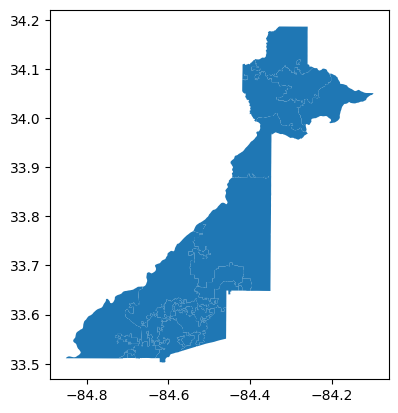

In [21]:
fulton_shp.plot()

<Axes: >

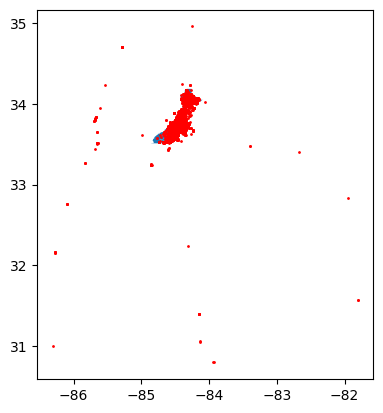

In [22]:
f, ax = plot.pyplot.subplots()
fulton_shp.plot(ax=ax)
geo_df.plot(ax=ax, markersize=1, color='red')

### Why are some parcels seemingly far outside Fulton county borders?

In [23]:
init_len = len(geo_df.index)
in_fulton = gpd.tools.sjoin(geo_df, fulton_shp)
print("Number of points/parcels eliminated: ", init_len - len(in_fulton.index))

Number of points/parcels eliminated:  1193


<Axes: >

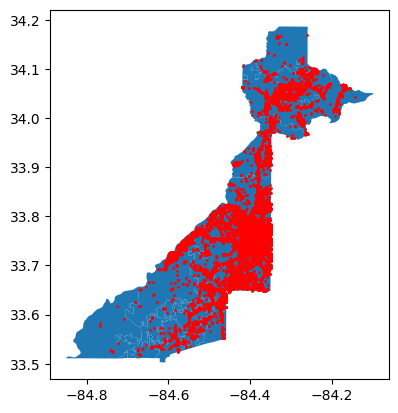

In [24]:
f, ax = plot.pyplot.subplots()
fulton_shp.plot(ax=ax)
in_fulton.plot(ax=ax, markersize=1, color='red')

In [25]:
cmr2011_dropdup['Parid'].nunique()

28572

In [26]:
in_fulton['parcelid'].nunique()

18410

### Correct number of commercial parcels in Fulton?

## APPEALS

In [27]:
appeals = pd.read_excel('../data/appeals/appeals2011-2022.xlsx')

In [28]:
appeals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279045 entries, 0 to 279044
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   TAXYR               279045 non-null  int64 
 1   PARID               279045 non-null  object
 2   HEARTYP             279045 non-null  object
 3   SUBKEY              279045 non-null  int64 
 4   NOTICE ASSESSMENT   279045 non-null  int64 
 5   CURRENT ASSESSMENT  279045 non-null  int64 
 6   CLASS               279045 non-null  object
dtypes: int64(4), object(3)
memory usage: 14.9+ MB


In [29]:
appeals.describe()

,TAXYR,SUBKEY,NOTICE ASSESSMENT,CURRENT ASSESSMENT
count,279045.00,279045.00,279045.00,279045.00
mean,2016.21,1.15,623186.89,536994.57
std,3.60,1.06,3270244.29,2811584.04
min,2011.00,0.00,0.00,0.00
25%,2013.00,1.00,47840.00,40000.00
50%,2017.00,1.00,133960.00,120840.00
75%,2019.00,1.00,294520.00,262000.00
max,2022.00,524.00,159475120.00,115918440.00


In [30]:
appeals.duplicated().sum()

0

In [31]:
appeals.head(2)

,TAXYR,PARID,HEARTYP,SUBKEY,NOTICE ASSESSMENT,CURRENT ASSESSMENT,CLASS
0,2011,06 0310 LL0516,B,1,50680,50680,R3
1,2011,06 0310 LL0524,B,1,50680,50680,R3


In [32]:
dup = appeals.duplicated(subset='PARID').sum()
print("Number of PARID duplicated: ", dup)
print("Percent: ", (len(appeals.index) - dup) / len(appeals.index) * 100)

Number of PARID duplicated:  143044
Percent:  48.738017165690124


### Lots of duplicate PARID in Appeals data

Aggregate rows so each PARID has one row, and create a new column with the count of rows it had

In [33]:
appeal_count = appeals.groupby('PARID')['CLASS'].count()

In [34]:
appeal_count.describe()

count   136001.00
mean         2.05
std          1.44
min          1.00
25%          1.00
50%          2.00
75%          3.00
max         12.00
Name: CLASS, dtype: float64

In [35]:
appeals = appeals.drop_duplicates(subset='PARID', keep='last')

In [36]:
appeals = appeals.merge(appeal_count.rename('count'), on='PARID', how='inner')

In [37]:
geo_appeals = geo_fulton.merge(appeals, left_on='parcelid', right_on='PARID', how='inner')

In [38]:
geo_appeals.head(3)

,parcelid,address2,match_addr,x,y,matchtype_,geoid,OBJECTID,taxyear,address,addrnumber,addrpredir,addrstreet,addrsuffix,addrposdir,addrunttyp,addrunit,owner,ownerandaddclean,ownerclean,owneraddresscleaned,taxdist,totassess,landassess,imprassess,totappr,landappr,imprappr,lucode,classcode,excode,livunits,landacres,nbrhood,subdiv,subdivnum,subdivlot,subdivblck,featureid,shape__area,shape__length,fullad,ownerocc,_merge,Atlanta,TAXYR,PARID,HEARTYP,SUBKEY,NOTICE ASSESSMENT,CURRENT ASSESSMENT,CLASS,count
0,06 0310 LL0490,3916 DAHLWINY CT,"3916 Dahlwiny Ct, Atlanta, Georgia, 30350",-84.28,33.96,100,131210101082,165522.00,2021.00,3916 DAHLWINY CT,3916.00,NaN,DAHLWINY,CT,NaN,NaN,NaN,HALDEMAN MAUREEN E & LARRY W,"HALDEMAN MAUREEN E & LARRY W, 3916 DAHLWINY C...",HALDEMAN MAUREEN E & LARRY W,"3916 DAHLWINY CT, SANDY SPRINGS GA 30350",59.00,387560.00,97680.00,289880.00,968900.00,244200.00,724700.00,101,R3,NaN,1.00,0.35,2116,NaN,24400,3,NaN,06 0310 LL0490,14966.93,494.24,"3916 DAHLWINY CT, SANDY SPRINGS GA 30350",Yes,Matched (3),1.00,2020,06 0310 LL0490,E,1,387560,328000,R3,3
1,06 0310 LL0516,3924 DAHLWINY CT,"3924 Dahlwiny Ct, Atlanta, Georgia, 30350",-84.28,33.96,100,131210101082,165535.00,2021.00,3924 DAHLWINY CT,3924.00,NaN,DAHLWINY,CT,NaN,NaN,NaN,ECKARD PEGGY M,"ECKARD PEGGY M, 3924 DAHLWINY CT, SANDY SPRI...",ECKARD PEGGY M,"3924 DAHLWINY CT, SANDY SPRINGS GA 30350",59.00,325320.00,66720.00,258600.00,813300.00,166800.00,646500.00,101,R3,NaN,1.00,0.34,2116,NaN,24400,5,NaN,06 0310 LL0516,14915.18,499.12,"3924 DAHLWINY CT, SANDY SPRINGS GA 30350",Yes,Matched (3),1.00,2011,06 0310 LL0516,B,1,50680,50680,R3,1
2,06 0310 LL0524,3928 DAHLWINY CT,"3928 Dahlwiny Ct, Atlanta, Georgia, 30350",-84.28,33.96,100,131210101082,165521.00,2021.00,3928 DAHLWINY CT,3928.00,NaN,DAHLWINY,CT,NaN,NaN,NaN,MOORE SARAH R & MOORE MARK E,"MOORE SARAH R & MOORE MARK E, 3928 DAHLWINY C...",MOORE SARAH R & MOORE MARK E,"3928 DAHLWINY CT, SANDY SPRINGS GA 30350",59.00,273880.00,66720.00,207160.00,684700.00,166800.00,517900.00,101,R3,NaN,1.00,0.34,2116,NaN,24400,6,NaN,06 0310 LL0524,15511.39,507.05,"3928 DAHLWINY CT, SANDY SPRINGS GA 30350",Yes,Matched (3),1.00,2011,06 0310 LL0524,B,1,50680,50680,R3,1


In [39]:
geo_appeals_df = gpd.GeoDataFrame(
    geo_appeals, geometry=gpd.points_from_xy(geo_appeals['x'], geo_appeals['y']), crs="epsg:4326"
)

In [40]:
geo_appeals_df = geo_appeals_df[(geo_appeals_df['x'] != 0) & (geo_appeals_df['x'] != '')]
geo_appeals_df = geo_appeals_df[(geo_appeals_df['y'] != 0) & (geo_appeals_df['y'] != '')]

<Axes: >

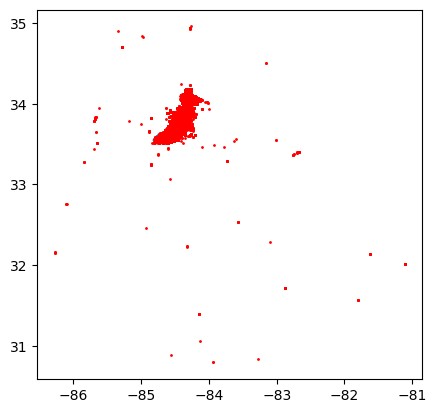

In [41]:
f, ax = plot.pyplot.subplots()
fulton_shp.plot(ax=ax)
geo_appeals_df.plot(ax=ax, markersize=1, color='red')

In [42]:
init_len = len(geo_appeals_df.index)
appeals_in_fulton = gpd.tools.sjoin(geo_appeals_df, fulton_shp)
print("Number of points/parcels eliminated: ", init_len - len(appeals_in_fulton.index))

Number of points/parcels eliminated:  10351


### All appeals mapped

Text(0.5, 1.0, 'All Appeals in \nFulton County Between 2011-2022')

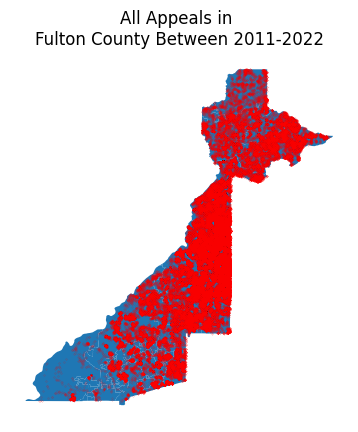

In [148]:
f, ax = plot.pyplot.subplots()
fulton_shp.plot(ax=ax)
appeals_in_fulton.plot(ax=ax, markersize=.01, color='red')

ax.axis('off')
ax.set_title(label="All Appeals in \nFulton County Between 2011-2022")

In [149]:
f.savefig('all_appeals.png', dpi=300)

Text(0.5, 1.0, 'Parcels in Fulton County with only \n1 Appeal Between 2011-2022')

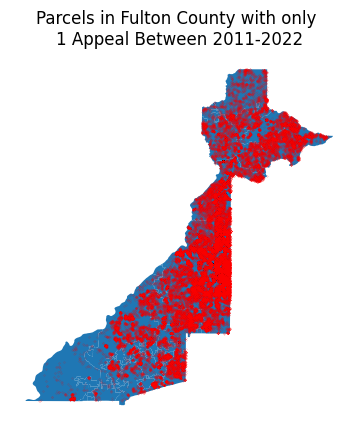

In [150]:
f, ax = plot.pyplot.subplots()
fulton_shp.plot(ax=ax)
appeals_in_fulton[appeals_in_fulton['count'] == 1].plot(ax=ax, markersize=.01, color='red')

ax.axis('off')
ax.set_title(label="Parcels in Fulton County with only \n1 Appeal Between 2011-2022")

In [151]:
f.savefig('one_appeal.png', dpi=300)

### Parcels with more than 1 appeal

In [ ]:
import folium
m = folium.Map()

Text(0.5, 1.0, 'Parcels in Fulton County with \n2 or More Appeals Between 2011-2022')

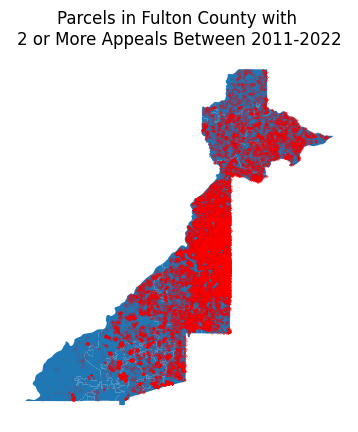

In [152]:
f, ax = plot.pyplot.subplots()
fulton_shp.plot(ax=ax)
appeals_in_fulton[appeals_in_fulton['count'] > 1].plot(ax=ax, markersize=.01, color='red')

ax.axis('off')
ax.set_title(label="Parcels in Fulton County with \n2 or More Appeals Between 2011-2022")

In [153]:
f.savefig('two_appeals.png', dpi=300)

Text(0.5, 1.0, 'Parcels in Fulton County with \n3 or More Appeals Between 2011-2022')

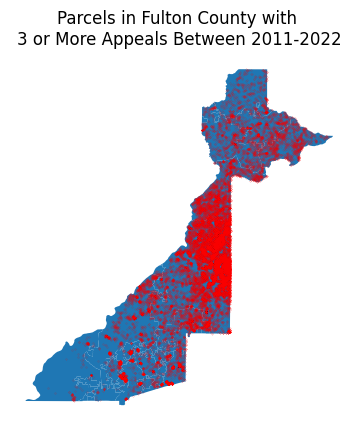

In [154]:
f, ax = plot.pyplot.subplots()
fulton_shp.plot(ax=ax)
appeals_in_fulton[appeals_in_fulton['count'] > 2].plot(ax=ax, markersize=.01, color='red')

ax.axis('off')
ax.set_title(label="Parcels in Fulton County with \n3 or More Appeals Between 2011-2022")

In [155]:
f.savefig('three_appeals.png', dpi=300)

In [143]:
appeals_in_fulton[['totappr', 'count']].describe(include='all')

,totappr,count
count,98741.00,110355.00
mean,613024.77,2.06
std,2692292.51,1.44
min,0.00,1.00
25%,176700.00,1.00
50%,351700.00,2.00
75%,613400.00,3.00
max,156456400.00,12.00


In [146]:
appeals_in_fulton.groupby('count')['totappr'].mean()

count
1      419067.97
2      510069.39
3      614703.87
4      803859.18
5     1121362.92
6     1890686.39
7     5287542.68
8     9280290.94
9    18943728.29
10   15152555.00
11     902480.00
12           NaN
Name: totappr, dtype: float64

In [100]:
color_map = {1: "#dfe7fd", 2: '#cddafd', 3: '#b8b8ff', 4: "#f8ad9d", 5: "#f4978e", 6: "#f08080", 7: "#f08080",
             8: "#f08080", 9: "#f08080", 10: "#f08080", 11: "#f08080", 12: "#f08080"}
appeals_in_fulton['color'] = appeals_in_fulton['count'].map(color_map)

In [159]:
appeals_in_fulton.columns

Index(['parcelid', 'address2', 'match_addr', 'x', 'y', 'matchtype_', 'geoid',
       'OBJECTID_left', 'taxyear', 'address', 'addrnumber', 'addrpredir',
       'addrstreet', 'addrsuffix', 'addrposdir', 'addrunttyp', 'addrunit',
       'owner', 'ownerandaddclean', 'ownerclean', 'owneraddresscleaned',
       'taxdist', 'totassess', 'landassess', 'imprassess', 'totappr',
       'landappr', 'imprappr', 'lucode', 'classcode', 'excode', 'livunits',
       'landacres', 'nbrhood', 'subdiv', 'subdivnum', 'subdivlot',
       'subdivblck', 'featureid', 'shape__area', 'shape__length', 'fullad',
       'ownerocc', '_merge', 'Atlanta', 'TAXYR', 'PARID', 'HEARTYP', 'SUBKEY',
       'NOTICE ASSESSMENT', 'CURRENT ASSESSMENT', 'CLASS', 'count', 'geometry',
       'index_right', 'OBJECTID_right', 'Name', 'TaxCode', 'AreaAc',
       'AreaSqMi', 'GEOID10', 'FeatureID', 'MuniCode', 'Shape__Are',
       'Shape__Len', 'color'],
      dtype='object')

In [185]:
appeals_dup_dropped = appeals_in_fulton.drop_duplicates(subset=['parcelid'])
appeals_dup_dropped = appeals_dup_dropped.sort_values('count')

Text(0.5, 1.0, 'Repeat Appeals Per Parcel in \nFulton County Between 2011-2022')

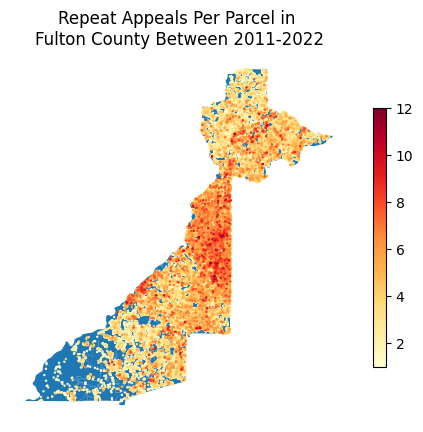

In [186]:
f, ax = plot.pyplot.subplots()
fulton_shp.plot(ax=ax)
appeals_dup_dropped.plot(ax=ax, markersize=.5,
                       column=appeals_dup_dropped['count'], cmap='YlOrRd',
                       legend=True, legend_kwds={'shrink': 0.7})
ax.axis('off')
ax.set_title(label="Repeat Appeals Per Parcel in \nFulton County Between 2011-2022")

In [187]:
f.savefig('repeat_appeals_without_dup.png', dpi=300)

### Appeals much more concentrated in the North, Buckhead specifically

## SALES

In [45]:
def read_file(file, folder, vars, datatypes, file_type):
    print("Reading file: ", file)
    df = pd.DataFrame()

    if file_type == "xlxs":
        df = pd.read_excel(
            '../data/' + folder + '/' + file + '.xlsx',
            usecols=vars,
            dtype=datatypes
        )
    else:
        df = pd.read_csv(
            '../data/' + folder + '/' + file + '.txt',
            sep='\t',
            dtype=datatypes
        )

    print("Successfully read file: ", file)
    return df

In [46]:
sales_files = ["Sales2011", "Sales2012", "Sales2013", "Sales2014",
             "Sales2015", "Sales2016", "Sales2017", "Sales2018",
             "Sales2019", "Sales2020", "Sales2021", "Sales2022"]

sales_vars = None # Since we are taking all variables in the file, we don't need to specify.

sales_datatypes = {"Taxyr": pd.StringDtype(), "Parid": pd.StringDtype()}

In [47]:
#Took 6 sec to read in all files on previous run.

sales_dfs = dict()

for file in sales_files:
    sales_dfs[file] = read_file(file, "sales", sales_vars, sales_datatypes, "txt")

print("Finished reading in all Sales files")

Reading file:  Sales2011


C:\Users\nicho\AppData\Local\Temp\ipykernel_16404\2523076442.py:12: DtypeWarning: Columns (10,26,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


Successfully read file:  Sales2011
Reading file:  Sales2012


C:\Users\nicho\AppData\Local\Temp\ipykernel_16404\2523076442.py:12: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


Successfully read file:  Sales2012
Reading file:  Sales2013
Successfully read file:  Sales2013
Reading file:  Sales2014
Successfully read file:  Sales2014
Reading file:  Sales2015


C:\Users\nicho\AppData\Local\Temp\ipykernel_16404\2523076442.py:12: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(
C:\Users\nicho\AppData\Local\Temp\ipykernel_16404\2523076442.py:12: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


Successfully read file:  Sales2015
Reading file:  Sales2016
Successfully read file:  Sales2016
Reading file:  Sales2017


C:\Users\nicho\AppData\Local\Temp\ipykernel_16404\2523076442.py:12: DtypeWarning: Columns (6,26,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


Successfully read file:  Sales2017
Reading file:  Sales2018
Successfully read file:  Sales2018
Reading file:  Sales2019


C:\Users\nicho\AppData\Local\Temp\ipykernel_16404\2523076442.py:12: DtypeWarning: Columns (6,26,38,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


Successfully read file:  Sales2019
Reading file:  Sales2020


C:\Users\nicho\AppData\Local\Temp\ipykernel_16404\2523076442.py:12: DtypeWarning: Columns (11,26,38,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


Successfully read file:  Sales2020
Reading file:  Sales2021


C:\Users\nicho\AppData\Local\Temp\ipykernel_16404\2523076442.py:12: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


Successfully read file:  Sales2021
Reading file:  Sales2022
Successfully read file:  Sales2022
Finished reading in all Sales files


C:\Users\nicho\AppData\Local\Temp\ipykernel_16404\2523076442.py:12: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


In [48]:
sales_appended = pd.concat(list(sales_dfs.values()))

prev_len = len(sales_appended.index)
sales_appended.drop_duplicates(inplace=True)

print("Number of entire rows duplicated (auto dropped): ", prev_len - len(sales_appended.index))
print("Percent: ", (prev_len - len(sales_appended.index)) / prev_len * 100)
print("Final size (after dropping entire row duplications): ", sales_appended.shape)

Number of entire rows duplicated (auto dropped):  63
Percent:  0.013200960527032634
Final size (after dropping entire row duplications):  (477175, 49)


In [49]:
parid_dup = sales_appended.duplicated(subset='Parid').sum()
print("Number of rows with the same Parid: ", parid_dup)
print("Percent: ", parid_dup / len(sales_appended.index) * 100)
print("-------")

parid_taxyr_dup = sales_appended.duplicated(subset=['Parid', 'Taxyr']).sum()
print("Number of rows with the same ['Parid', 'Taxyr']: ", parid_taxyr_dup)
print("Percent: ", parid_taxyr_dup / len(sales_appended.index) * 100)

Number of rows with the same Parid:  253529
Percent:  53.13124115890396
-------
Number of rows with the same ['Parid', 'Taxyr']:  96444
Percent:  20.211452821291978


In [50]:
sales_appended.info()

<class 'pandas.core.frame.DataFrame'>
Index: 477175 entries, 0 to 58757
Data columns (total 49 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Taxyr                477163 non-null  string 
 1   Saledt: Year (YYYY)  477163 non-null  float64
 2   Saledt: Month (Mon)  477163 non-null  object 
 3   Taxdist              477163 non-null  object 
 4   Parid                477175 non-null  string 
 5   Nbhd                 477163 non-null  object 
 6   Class                477162 non-null  object 
 7   Luc                  477163 non-null  object 
 8   Saledt               477163 non-null  object 
 9   Book                 477135 non-null  object 
 10  Page                 477120 non-null  object 
 11  SALES PRICE          477107 non-null  object 
 12  FAIR MARKET VALUE    477163 non-null  object 
 13  DEED TYPE            477157 non-null  object 
 14  Aprland              477142 non-null  object 
 15  Aprbldg              47

In [51]:
parid_dt_dup = sales_appended.duplicated(subset=['Parid', 'Saledt: Month (Mon)']).sum()
print("Number of rows with the same ['Parid', 'Saledt: Month (Mon)']: ", parid_dt_dup)
print("Percent: ", parid_dt_dup / len(sales_appended.index) * 100)

Number of rows with the same ['Parid', 'Saledt: Month (Mon)']:  79094
Percent:  16.575470215329805


In [52]:
parid_dt_dup = sales_appended.duplicated(subset=['Parid', 'Saledt']).sum()
print("Number of rows with the same ['Parid', 'Saledt']: ", parid_dt_dup)
print("Percent: ", parid_dt_dup / len(sales_appended.index) * 100)

Number of rows with the same ['Parid', 'Saledt']:  47236
Percent:  9.89909362393252


### Parid and Saledt is not a unique key. What can be a unique key? Are these parcels with multiple buildings being sold?

In [53]:
geo_sales = geo_fulton.merge(sales_appended, left_on='parcelid', right_on='Parid', how='inner')

In [54]:
geo_sales_df = gpd.GeoDataFrame(
    geo_sales, geometry=gpd.points_from_xy(geo_sales['x'], geo_sales['y']), crs="epsg:4326"
)

In [55]:
geo_sales_df = geo_sales_df[(geo_sales_df['x'] != 0) & (geo_sales_df['x'] != '')]
geo_sales_df = geo_sales_df[(geo_sales_df['y'] != 0) & (geo_sales_df['y'] != '')]

<Axes: >

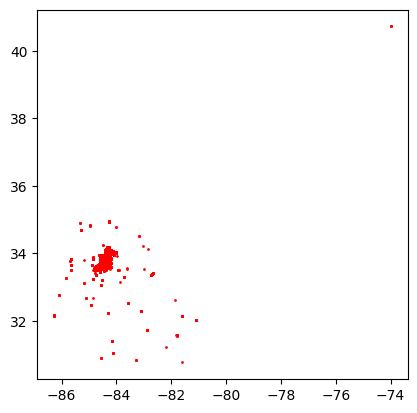

In [56]:
f, ax = plot.pyplot.subplots()
fulton_shp.plot(ax=ax)
geo_sales_df.plot(ax=ax, markersize=1, color='red')

In [57]:
init_len = len(geo_sales_df.index)
geo_sales_df = gpd.tools.sjoin(geo_sales_df, fulton_shp)
print("Number of points/parcels eliminated: ", init_len - len(geo_sales_df.index))

Number of points/parcels eliminated:  48146


<Axes: >

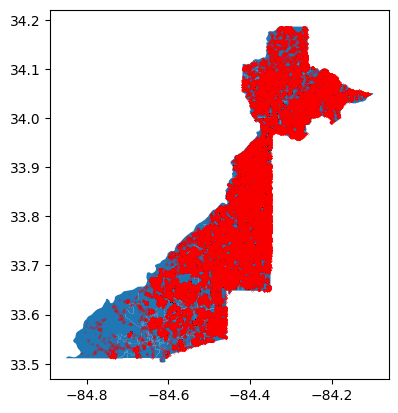

In [58]:
f, ax = plot.pyplot.subplots()
fulton_shp.plot(ax=ax)
geo_sales_df.plot(ax=ax, markersize=.01, color='red')

In [59]:
sales_appended.describe()

,Saledt: Year (YYYY),Revcode,Adrpre,Adrno,Livunit,Calcacres,Notecd2,Bldgros V,Mscbld V,Val30 SUM,Areasum
count,477163.00,279605.00,0.00,477114.00,469939.00,469911.00,3579.00,3722.00,10471.00,304445.00,304490.00
mean,2015.99,2.36,NaN,2544.79,1.65,0.66,19.06,739451.57,219.78,551150.60,4447.27
std,3.75,0.96,NaN,3731.11,13.76,4.63,3.91,9071120.92,478.29,3388822.50,33925.33
min,2010.00,1.00,NaN,0.00,0.00,0.00,6.00,0.00,0.00,0.00,0.00
25%,2012.00,1.00,NaN,430.00,1.00,0.06,18.00,0.00,100.00,119500.00,1074.00
50%,2017.00,3.00,NaN,1246.00,1.00,0.21,21.00,0.00,150.00,231400.00,1600.00
75%,2019.00,3.00,NaN,3460.00,1.00,0.41,22.00,1000.00,250.00,434800.00,2560.00
max,2021.00,10.00,NaN,1452350.00,940.00,738.93,24.00,250000000.00,30000.00,292094600.00,3020270.00


In [60]:
len(geo_sales_df.index)

382307

In [61]:
sales_appended.head(3)

,Taxyr,Saledt: Year (YYYY),Saledt: Month (Mon),Taxdist,Parid,Nbhd,Class,Luc,Saledt,Book,Page,SALES PRICE,FAIR MARKET VALUE,DEED TYPE,Aprland,Aprbldg,Costval,Saleval,Who,Wen,GRANTOR,GRANTEE,Revcode,Reascd,Adrpre,Adrno,Adrdir,Adrstr,Adrsuf,Adrsuf2,Cityname,Unitno,Livunit,Calcacres,Zoning,Notecd1,Notecd2,Chgrsn,Cur,Cur.1,Whocalc,Wencalc,Saletype,Appraiser ID,Income,Bldgros V,Mscbld V,Val30 SUM,Areasum
0,2011,2010.00,Oct,59,06 0310 LL0417,0604,R4,100,20-OCT-2010,49589.00,00558,0,"36,700",WD,36700.00,0.00,36700.00,T,TA_TJONES,09-DEC-2010,MORRISON MARION A,WOODALL LLC,1.00,NaN,NaN,0.00,NaN,OLD LAWRENCEVILLE,RD,NaN,FUL,NaN,0.00,6.20,AG1,NaN,NaN,MN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011,2010.00,Jun,59,06 0310 LL0490,2116,R3,101,07-JUN-2010,49098.00,0288,"794,600","717,100",WD,195000.00,522100.00,717100.00,0,FIXSALV,04-MAR-2011,CDG HOMES LLC,EDMUNDS KEITH S & KIMBERLY C,1.00,00,NaN,3916.00,NaN,DAHLWINY,CT,NaN,SANDY SPRINGS,NaN,1.00,0.35,CUP,NaN,NaN,NC,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011,2010.00,Jul,59,06 0310 LL0581,2116,R3,101,14-JUL-2010,49244.00,00522,"800,000","590,400",WD,127700.00,462700.00,590400.00,0,FIXSALV,04-MAR-2011,CAPITAL DESIGN HOMES LLC,MEHDIPOUR MOHAMMADREZ & SADEGHI SHIVA,NaN,00,NaN,3952.00,NaN,DAHLWINY,CT,NaN,FUL,NaN,1.00,0.35,AG1,NaN,NaN,MN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
sales_zero = len(sales_appended[sales_appended['SALES PRICE'] == '0'].index)
print("Count of Sales Price is Zero: ", sales_zero)
print("Percent: ", sales_zero / len(sales_appended.index) * 100)

Count of Sales Price is Zero:  98273
Percent:  20.594750353643843


### How is Fair Market Value calculated?
### Why are some Sales Price == 0?
### Taxyr is one year ahead of Sale year

## STANDARDS DIGEST
(only using 2022 for testing)

These appear to be parcel data? Why is one not labeled STANDARDS? 14th, 17th, and Atlanta are the options.

In [63]:
digest14 = pd.read_excel('../data/digest/parcel2022.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: '../data/digest/parcel2022.xlsx'

In [ ]:
digest14.describe()

In [ ]:
digest14.info(verbose=True)

In [ ]:
digest14['Own1']

In [ ]:
digest14['Own2']

### Own1 versus Own2? Any diff?

In [ ]:
digest14['Cityname'].unique()

In [ ]:
digest17 = pd.read_excel('../data/digest/STANDARDS DIGEST 17TH 2022.xlsx')

In [ ]:
digest17['Cityname'].unique()

In [ ]:
digestATL = pd.read_excel('../data/digest/STANDARDS DIGEST ATL 2022.xlsx')

In [ ]:
digestATL['Cityname'].unique()

### The Citynames make it seem like 14th and 17th == ATL Digest which is what they seemed to say in the email too

In [ ]:
geo_fulton = geo_fulton[(geo_fulton['x'] != 0) & (geo_fulton['x'] != '')]
geo_fulton = geo_fulton[(geo_fulton['y'] != 0) & (geo_fulton['y'] != '')]

Plot Digest 14

In [ ]:
geo_14 = geo_fulton.merge(digest14, left_on='parcelid', right_on='Parid', how='inner')
geo_14 = gpd.GeoDataFrame(
    geo_14, geometry=gpd.points_from_xy(geo_14['x'], geo_14['y']), crs="epsg:4326"
)
f, ax = plot.pyplot.subplots()
fulton_shp.plot(ax=ax)
geo_14.plot(ax=ax, markersize=1, color='red')

Plot Digest 17

In [ ]:
geo_17 = geo_fulton.merge(digest17, left_on='parcelid', right_on='Parid', how='inner')
geo_17 = gpd.GeoDataFrame(
    geo_17, geometry=gpd.points_from_xy(geo_17['x'], geo_17['y']), crs="epsg:4326"
)
f, ax = plot.pyplot.subplots()
fulton_shp.plot(ax=ax)
geo_17.plot(ax=ax, markersize=1, color='red')

Plot Digest ATL

In [ ]:
geo_atl = geo_fulton.merge(digestATL, left_on='parcelid', right_on='Parid', how='inner')
geo_atl = gpd.GeoDataFrame(
    geo_atl, geometry=gpd.points_from_xy(geo_atl['x'], geo_atl['y']), crs="epsg:4326"
)
f, ax = plot.pyplot.subplots()
fulton_shp.plot(ax=ax)
geo_atl.plot(ax=ax, markersize=1, color='red')

### Seems like 14th and 17th DIGESTS are a subset of ATL Digest
### Clearly these alone do not cover all of Fulton, below let's add NF and SF

In [ ]:
nf = pd.read_excel('../data/digest/parcel_nf_2022.xlsx')

In [ ]:
nf.info()

In [ ]:
nf['Cityname'].unique()

In [ ]:
sf = pd.read_excel('../data/digest/parcel_sf_2022.xlsx')

In [ ]:
sf['Cityname'].unique()

Plot NF

In [ ]:
geo_nf = geo_fulton.merge(nf, left_on='parcelid', right_on='Parid', how='inner')
geo_nf = gpd.GeoDataFrame(
    geo_nf, geometry=gpd.points_from_xy(geo_nf['x'], geo_nf['y']), crs="epsg:4326"
)
f, ax = plot.pyplot.subplots()
fulton_shp.plot(ax=ax)
geo_nf.plot(ax=ax, markersize=1, color='red')

Drop coords outside the Fulton boundary

In [ ]:
init_len = len(geo_nf.index)
geo_nf = gpd.tools.sjoin(geo_nf, fulton_shp)
print("Number of points/parcels eliminated: ", init_len - len(geo_nf.index))

In [ ]:
len(geo_nf.index)

In [ ]:
f, ax = plot.pyplot.subplots()
fulton_shp.plot(ax=ax)
geo_nf.plot(ax=ax, markersize=1, color='red')

### Why are some parcels in South Fulton?

Plot SF

In [ ]:
geo_sf = geo_fulton.merge(sf, left_on='parcelid', right_on='Parid', how='inner')
geo_sf = gpd.GeoDataFrame(
    geo_sf, geometry=gpd.points_from_xy(geo_sf['x'], geo_sf['y']), crs="epsg:4326"
)
f, ax = plot.pyplot.subplots()
fulton_shp.plot(ax=ax)
geo_sf.plot(ax=ax, markersize=1, color='red')

Drop outside Fulton boundary

In [ ]:
init_len = len(geo_sf.index)
geo_sf = gpd.tools.sjoin(geo_sf, fulton_shp)
print("Number of points/parcels eliminated: ", init_len - len(geo_sf.index))

In [ ]:
f, ax = plot.pyplot.subplots()
fulton_shp.plot(ax=ax)
geo_sf.plot(ax=ax, markersize=1, color='red')

Plot NF, SF, and ATL DIGESTS

In [ ]:
f, ax = plot.pyplot.subplots()
fulton_shp.plot(ax=ax)
geo_nf.plot(ax=ax, markersize=.01, color='red')
geo_sf.plot(ax=ax, markersize=.01, color='purple')
geo_atl.plot(ax=ax, markersize=.01, color='green')

In [ ]:
nf.head(3)

In [ ]:
nf['Parid'].head(3)

### Sometimes the spaces in the Parid are different even though they are the same parcel. Will stripping/cleaning cause any issues?

In [ ]:
nf[nf['Parid'] == '06 0310  LL0417']

In [ ]:
sales_appended[sales_appended['Parid'] ==  '06 031100030032']

Use '06 031000020232' as an example where there are multiple rows for one parcel (e.g. multiple buildings). Let's look at how that's stored in the Parcel data to try to find a unique identifer between them.

For this specific example, everything about the property is the same but the grantee and grantor. This indicates that it is only one building on the parcel, but there were multiple financial transcations.

How many entries are like this? We can estimate this by dropping the Grantor/Grantee columns and seeing the change in the number of duplicate rows.

In [ ]:
sales_appended.duplicated().sum()

To begin, there are no complete row duplicates.

In [ ]:
sales_appended.drop(['Page', 'Book', 'Who', 'Wen', 'GRANTOR', 'GRANTEE'], axis=1).duplicated().sum()

In [ ]:
len(sales_appended.index)

6665... not many explained by just Grantor, Grantee, and assessor info alone...

Let's find more duplicates to see if there are any patterns.

In [ ]:
sales_appended.groupby('Parid').size().reset_index('Parid').rename({0:'count'}, axis=1).sort_values(by='count', ascending=False)

Let's look at parcel '09F220100990190' with 27 entries in Sales.

In [ ]:
sales_appended[sales_appended['Parid'] == '09F220100990190'].head(3)

Book, Page, Who, and Wen are different.

In [ ]:
sales_appended[(sales_appended['Parid'] == '09F220100990190') & (sales_appended['Taxyr'] == '2021')].head(4)

Different SALES PRICE, nothing else. On Google Maps, it looks like just a regular single family home. So how is this explained?

Let's take a different example, '14 005700100241', with 29 duplications.

In [ ]:
sales_appended[(sales_appended['Parid'] == '14 005700100241')].head(4)

Different Saledt, Page, SALES PRICE (really low tho), Who, Wen, Grantor. Looks like a single-family rural ish neighborhood on Google Maps (not a suburban development).

In [ ]:
digestATL[digestATL['Parid'] == '14 005700100241']

Multiple entries in Sales with different prices on the same date and to different buyers but only one entry in Parcels.

Best idea for unique key could be [Parid, Taxyr, SALES PRICE]?

---
# **Example Duplicates**

### Duplicate analysis for CMR data appended for all years as an example:
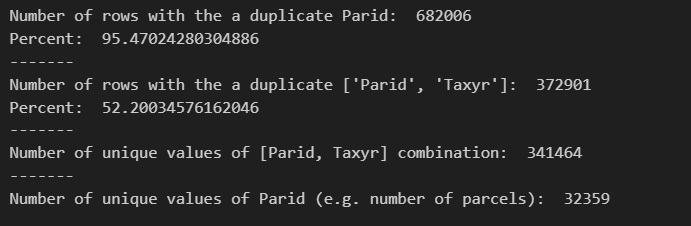   
   
**There are a high number of duplicate Parid, Taxyr keys, meaning some parcels have many rows recorded under the same Parid for the same Taxyr.**

## **Parcel [Digest] (using NF 2022 as a sample)**

10 greatest duplicate counts by Parid

In [ ]:
nf.groupby('Parid').size().reset_index('Parid').rename({0:'count'}, axis=1).sort_values(by='count', ascending=False).head(10)

Total number of duplicates in data

### **Example 1 on Excel file, Parid = 11 114004090029**

In [ ]:
nf[nf['Parid'] == '11 114004090029'].style.background_gradient(axis=0, cmap='tab10')

**SAME PARID, DIFFERENT:**
D Card, Stories, Extwall, Style, D Yrblt, Rmtot, Rmbed, Rmfam, Fixbath, Fixhalf, Fixaddl, Fixtot, Plumval, Bsmt, Bsmtval, Fuel, Heatsys, Heatval, Wbfp 0, Wbfp S, Wbfpval, Mgfa, Sfla, Areafact, Shfact, D Grade, D Grdfact, D Cdu, Adjfact.

**Note2: "Several living units on Parcel"**

### **Example 2 on Excel file, Parid = 12 191404151088**

In [ ]:
nf[nf['Parid'] == '12 191404151088'].style.background_gradient(axis=0, cmap='tab10')

**SAME PARID, DIFFERENT:**
D Card, Stories, Extwall, D Yrblt, Rmtot, Rmbed, Rmfam, Fixbath, Fixhalf, Fixaddl, Fixtot, Plumval, Bsmt, Bsmtval, Heat, Heatsys, Heatval, Wbfp 0, Wbfp S, Wbfp Pf, Wbfpval, Mgfa, Sfla, Areafact, Shfact, D Grade, D Grdfact, D Cdu, Adjfact.

### **Example 3 on Excel file, Parid = 12 147001780463**

In [ ]:
nf[nf['Parid'] == '12 147001780463'].style.background_gradient(axis=0, cmap='tab10')

**SAME PARID, DIFFERENT:**
D Card, Stories, D Yrblt, D Yrremod, Rmtot, Rmbed, Rmfam, Fixbath, Fixhalf, Fixaddl, Fixtot, Plumval, Bsmt, Bsmtval, Heatval, Mgfa, Sfla, Areafact, Shfact, D Grade, D Grdfact.

**Note1: "STRUCTURE IS NOT BARN BUT A STORAGE"**

### **Example 4 on Excel file, Parid = 12 175003560310**

In [ ]:
nf[nf['Parid'] == '12 175003560310'].style.background_gradient(axis=0, cmap='tab10')

**SAME PARID, DIFFERENT:**
D Card, Stories, D Yrblt, Rmtot, Rmbed, Rmfam, Fixbath, Fixhalf, Fixaddl, Fixtot, Plumval, Bsmt, Bsmtval, Heat, Fuel, Heatsys, Heatval, Wbfp O, Wbfp S, Wbfpval, Mgfa, Sfla, Areafact, Shfact, D Grade, D Grdfact.

**Note(s): "PARENT OF COMBINATION NO 25933, PARCELS 029-4 AND 036-9 COMBINED WITH, ..."**

### **Example 5 on Excel file, Parid = 22 397008820403**

In [ ]:
nf[nf['Parid'] == '22 397008820403'].style.background_gradient(axis=0, cmap='tab10')

**SAME PARID, DIFFERENT:**
D Card, Stories, Extwall, D Yrblt, Rmtot, Rmbed, Rmfam, Fixbath, Fixhalf, Fixaddl, Fixtot, Plumval, Bsmt, Bsmtval, Fuel, Heatsys, Heatval, Ufeatval, Wbfp Pf, Wbfpval, Bsmtcar, Bgarval, Mgfa, Sfla, Areafact, Shfact, D Grade, D Grdfact.

**Note1: "CORRECTED DATA/ADDITIONS"**

---
## **Sales (Standards Sales; all years, appended)**

10 greatest duplicate counts by Parid. It makes sense that Sales has duplicates, a property can be sold multiple times, but let's look at some examples.

In [ ]:
sales_appended.groupby('Parid').size().reset_index('Parid').rename({0:'count'}, axis=1).sort_values(by='count', ascending=False).head(10)

In [ ]:
sales_0 = len(sales_appended[((sales_appended['SALES PRICE'] == '0') | (sales_appended['SALES PRICE'] is None)) & ((sales_appended['DEED TYPE'] != 'QC') & (sales_appended['DEED TYPE'] != 'G'))].index)
print("Percent of entries with SALES PRICE = 0:", sales_0/len(sales_appended) * 100)

### **Example 1 on Excel file, Parid = 06 0313  LL0331**

In [ ]:
sales_appended[sales_appended['Parid'] == '06 0313  LL0331'].head(4).style.background_gradient(axis=0, vmin=1, vmax=5, cmap='tab10')

Same Saledt and Wen; Grantor and Grantee are the same across all purchases. Is this a multiparcel sale? Salesprice is different for each purchase in this case, are there ever cases where the salesprice will be recorded as the total of the multiparcel sale?

### **Example 2 on Excel file, Parid = 09F250601050319**

In [ ]:
sales_appended[sales_appended['Parid'] == '09F250601050319'].head(4).style.background_gradient(axis=0, vmin=1, vmax=5, cmap='tab10')

Same Grantee, different Grantors. Salesprice 0 for every transcation. The deed is a QC though.

### **Example 3 on Excel file, Parid = 14 005700100241**

In [ ]:
sales_appended[sales_appended['Parid'] == '14 005700100241'].head(4).style.background_gradient(axis=0, vmin=1, vmax=5, cmap='tab10')

Different Saledt, Page, Sales Price, Grantor; One company buying from multiple owners (with different properties?) on one parcel

### **Example 4 on Excel file, Parid = 09F220100990190**

In [ ]:
sales_appended[sales_appended['Parid'] == '09F220100990190'].iloc[1:4, :].style.background_gradient(axis=0, vmin=1, vmax=5, cmap='tab10')

Diff saledt, book, page, salesprice, wen

In [ ]:
sales_appended[sales_appended['Parid'] == '09F220100990190'].head(4).style.background_gradient(axis=0, vmin=1, vmax=5, cmap='tab10')

In [ ]:
sales_appended['Luc'].unique()

In [ ]:
sales_appended['Class'].unique()

In [ ]:
import pandas as pd

In [ ]:
sales2015 = pd.read_csv('../data/sales/Sales2015.txt', sep='\t')

C:\Users\nicho\AppData\Local\Temp\ipykernel_28428\3205853461.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  sales2015 = pd.read_csv('../data/sales/Sales2015.txt', sep='\t')


In [ ]:
digestATL = pd.read_excel('../data/digest/parcel_atl_2011-2012.xlsx')

: 

: 

In [ ]:
digestATL = pd.read_excel('../data/digest/parcel_atl_2015.xlsx')

In [ ]:
digestATL.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136983 entries, 0 to 136982
Data columns (total 122 columns):
 #    Column         Dtype  
---   ------         -----  
 0    Taxyr          float64
 1    Parid          object 
 2    Nbhd           object 
 3    Situs Adrno    float64
 4    Situs Adrdir   object 
 5    Situs Adrstr   object 
 6    Situs Adrsuf   object 
 7    Situs Adrsuf2  object 
 8    Cityname       object 
 9    Zoning         object 
 10   Muni           object 
 11   Class          object 
 12   Luc            object 
 13   Livunit        float64
 14   Calcacres      float64
 15   Location       float64
 16   Fronting       float64
 17   Street1        float64
 18   Street2        float64
 19   Traffic        float64
 20   Topo1          float64
 21   Topo2          float64
 22   Topo3          float64
 23   Util1          float64
 24   Util2          float64
 25   Util3          float64
 26   Parkprox       float64
 27   Parkquanit     float64
 28   Parktype    

In [ ]:
sales2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18681 entries, 0 to 18680
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Taxyr                18680 non-null  float64
 1   Saledt: Year (YYYY)  18680 non-null  float64
 2   Saledt: Month (Mon)  18680 non-null  object 
 3   Taxdist              18680 non-null  object 
 4   Parid                18681 non-null  object 
 5   Nbhd                 18680 non-null  object 
 6   Appraiser ID         18680 non-null  object 
 7   Class                18680 non-null  object 
 8   Luc                  18680 non-null  object 
 9   Saledt               18680 non-null  object 
 10  Book                 18680 non-null  float64
 11  Page                 18680 non-null  float64
 12  SALES PRICE          18680 non-null  object 
 13  FAIR MARKET VALUE    18680 non-null  object 
 14  Income               18680 non-null  object 
 15  Costval              18680 non-null 

We know we have a good match key when:
1. No new rows are created. E.g. length of original sales dataframe should be equal to the length of the resultant df.
2. Every sale has parcel data matched.

In [ ]:
len(sales2015.index)

18681

In [ ]:
test_merge = sales2015.merge(digestATL, how='left', on=['Parid', 'Taxyr'])

In [ ]:
len(test_merge.index)

18760

In [ ]:
pd.set_option('display.max_columns', 150)

In [ ]:
sales2015[sales2015['Cityname'] == "ATL"].head(1)

,Taxyr,Saledt: Year (YYYY),Saledt: Month (Mon),Taxdist,Parid,Nbhd,Appraiser ID,Class,Luc,Saledt,Book,Page,SALES PRICE,FAIR MARKET VALUE,Income,Costval,Whocalc,Wencalc,DEED TYPE,Bldgros V,Mscbld V,Aprland,Aprbldg,Saleval,Saletype,Revcode,Reascd,Who,Wen,GRANTOR,GRANTEE,Adrpre,Adrno,Adrdir,Adrstr,Adrsuf,Adrsuf2,Cityname,Unitno,Livunit,Calcacres,Zoning,Notecd1,Notecd2,Chgrsn,Cur,Cur.1
5579,2015.0,2014.0,May,05,14 0001 LL0779,14463,007,R3,101,19-MAY-2014,53843.0,399.0,"51,000","18,000",0,"18,000",LP401,12-JAN-2015,WD,NaN,NaN,"2,900","15,100",0,2,NaN,NaN,TA_ADORSEY,13-JAN-2015,"DEANNA FRANK, LLC",BRYAN SHANE &,NaN,1085.0,NaN,HENDON,RD,SE,ATL,NaN,1.0,0.34,R4,NaN,NaN,MN,Y,Y


In [ ]:
digestATL[digestATL['Parid'].str.replace(' ', '') == '140001LL0779']

,Taxyr,Parid,Nbhd,Situs Adrno,Situs Adrdir,Situs Adrstr,Situs Adrsuf,Situs Adrsuf2,Cityname,Zoning,Muni,Class,Luc,Livunit,Calcacres,Location,Fronting,Street1,Street2,Traffic,Topo1,Topo2,Topo3,Util1,Util2,Util3,Parkprox,Parkquanit,Parktype,Note1,Note2,Note3,Note4,Notecd1,Notecd2,Ofcard,Bldgros D,Bldgros V,Mscbld N,Mscbld V,Chgrsn,Taxdist,Own1,Own2,Owner Adrno,Owner Adradd,Owner Adrdir,Owner Adrstr,Owner Adrsuf,Owner Adrsuf2,Cityname.1,Statecode,Country,Unitno,Zip1,Reascd,Spcflg,Aprland,Aprbldg,Revcode,Revreas,Revland,Revbldg,Revtot,Aprtot,D Card,Stories,Extwall,Style,D Yrblt,D Effyr,D Yrremod,Rmtot,Rmbed,Rmfam,Fixbath,Fixhalf,Fixaddl,Fixtot,Plumval,Bsmt,Bsmtval,Heat,Fuel,Heatsys,Heatval,Attic,Atticval,Unfinarea,Unfinval,Recromarea,Recval,Finbsmtarea,Finbsmtval,Ufeatarea,Ufeatval,Wbfp O,Wbfp S,Wbfp Pf,Wbfpval,Bsmtcar,Bgarval,Msc1des,Msc1num,Msc1val,Msc2des,Msc2num,Msc2val,Condolvl,Condovw,Mgfa,Sfla,Areafact,Shfact,D Grade,D Grdfact,Cddesc,Cdpct,D Cdu,Adjfact 2,D Pctcomplete,Cur
16,2015.0,14 0001 LL0779,14463,1085.0,NaN,HENDON,RD,SE,ATL,R4,5,R3,101,1.0,0.34,6.0,9.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,8.0,NaN,3.0,2.0,3.0,AN LAND SPLIT 95,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,MN,5,BRYAN SHANE &,JULIUS KAREN,1085.0,NaN,NaN,HENDON,RD,NaN,ATLANTA,GA,NaN,NaN,30354,NaN,NaN,2900.0,15100.0,NaN,NaN,NaN,NaN,NaN,18000.0,1.0,1.0,1.0,2,1993.0,NaN,NaN,4.0,2.0,0.0,2.0,0.0,2.0,8.0,1891.0,4.0,0.0,4.0,1.0,1.0,2739.0,1.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,1.0,2143.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,1260.0,1260.0,1.035,1.0,C-,0.92,NaN,NaN,AV,0.203,NaN,Y


In [ ]:
sales2015[sales2015['Parid'].str.replace(' ', '') == '170140LL0758']

,Taxyr,Saledt: Year (YYYY),Saledt: Month (Mon),Taxdist,Parid,Nbhd,Appraiser ID,Class,Luc,Saledt,Book,Page,SALES PRICE,FAIR MARKET VALUE,Income,Costval,Whocalc,Wencalc,DEED TYPE,Bldgros V,Mscbld V,Aprland,Aprbldg,Saleval,Saletype,Revcode,Reascd,Who,Wen,GRANTOR,GRANTEE,Adrpre,Adrno,Adrdir,Adrstr,Adrsuf,Adrsuf2,Cityname,Unitno,Livunit,Calcacres,Zoning,Notecd1,Notecd2,Chgrsn,Cur,Cur.1


In [ ]:
digestATL.groupby('Parid').size().reset_index('Parid').rename({0:'count'}, axis=1).sort_values(by='count', ascending=False).head(10)

,Parid,count
113535,17 011100210013,25
41165,14 011100030566,8
108163,17 010600250099,8
41774,14 011200070413,4
24855,14 005500060892,4
118790,17 014900040127,4
115785,17 0140 LL0758,3
4411,14 001300060992,3
120765,17 015500020625,3
15165,14 004300060533,3


In [2]:
import pandas as pd
import csv

In [11]:
b_addr = pd.read_csv('../data/business/BizEntityAddress.txt', sep='\t', encoding='latin', engine='python', quoting=csv.QUOTE_NONE)

In [12]:
b_addr.sample(10)

,BusinessId,ControlNumber,StreetAddress1,StreetAddress2,City,State,Zip,Country
912879,695324,J520290,129 CARDINAL RD SE,NaN,WHITE,GA,30184,United States
946289,1033613,K729365,5805 STATE BRIDGE RD STE G-123,NaN,DULUTH,GA,30097,United States
2550426,2498351,18049753,3301 Windy Ridge Parkway,Suite 320,Atlanta,GA,30339,United States
822407,1100482,K903152,2899 ELMWOOD DR SE,NaN,SMYRNA,GA,30080,NaN
701101,351114,0527226,1107 Asbury Square,NaN,Atlanta,GA,30346,NaN
994380,999207,K634524,2158 BELVEDERE DR NW,NaN,ATLANTA,GA,30318,United States
1840127,1920592,14028817,3355 MCDANIEL RD,#13408,DULUTH,GA,30096,NaN
723989,565631,H851370,15710 JFK BLVD STE 700,NaN,HOUSTON,TX,77032,United States
2182964,1692939,12009575,42 CAMDEN CIRCLE,NaN,NEWNAN,GA,30265,NaN
73774,2729388,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
b_entity = pd.read_csv('../data/business/BizEntity.txt', sep='\t', encoding='latin', engine='python', quoting=csv.QUOTE_NONE)

In [14]:
b_entity.sample(2)

,ControlNumber,BusinessId,BusinessName,BusinessTypeDesc,CommencementDate,EffectiveDate,IsPerpetual,EndDate,ForeignState,ForeignCountry,ForeignDateOfOrganization,EntityStatusDate,EntityStatus,RegisteredAgentId,Good Standing,PhoneNumber,EmailAddress,NAICSCODE,NAICSSubCode
3222379,21273086,3470612,"The John Lula Agency, LLC",Domestic Limited Liability Company,NaN,10/21/2021,1.0,NaN,Georgia,NaN,NaN,NaN,Active/Compliance,8543729.0,1,NaN,,Any legal purpose,NaN
1698311,12030107,1710866,"INTERRAD MEDICAL, INC.",Foreign Profit Corporation,03/26/2012,03/26/2012,1.0,NaN,Delaware,NaN,NaN,2021-02-26,Active/Compliance,7248595.0,1,NaN,,NaN,NaN


In [15]:
b_filing = pd.read_csv('../data/business/BizEntityFilingHistory.txt', sep='\t', encoding='latin', engine='python', quoting=csv.QUOTE_NONE)

In [16]:
b_filing.sample(10)

,businessid,ControlNumber,FilingNo,BusinessTypeDesc,Description,FiledDate
19924013,2004048,14112275,20015983,Domestic Nonprofit Corporation,Annual Registration,01/15/2021
5797219,1283898,07076132,11327428,Domestic Limited Liability Company,Name Reservation,08/15/2007
5527295,48364,0048364,5554877,Domestic Profit Corporation,Annual Registration,03/19/2007
13679955,2205475,16052328,13186422,Domestic Profit Corporation,Business Formation,05/27/2016
20454249,3251294,21083418,20549725,Domestic Limited Liability Company,Business Formation,03/19/2021
207221,736997,J721342,11382791,Domestic Profit Corporation,Business Formation,01/29/1991
11427113,1114205,K916875,9677348,Domestic Limited Partnership,Business Amendment,04/23/2014
7238351,337617,0513724,7129112,Foreign Limited Liability Company,Annual Registration,03/04/2009
13031374,1190619,0683637,12532765,Domestic Nonprofit Corporation,Annual Registration,01/26/2016
18438139,2833310,19147281,18510131,Foreign Profit Corporation,Annual Registration,02/03/2020


In [17]:
b_officers = pd.read_csv('../data/business/BizEntityOfficers.txt', sep='\t', encoding='latin', engine='python', quoting=csv.QUOTE_NONE, nrows=10)

In [18]:
b_officers.sample(10)

,businessid,ControlNumber,Description,FirstName,MiddleName,LastName,CompanyName,Line1,Line2,City,State,Zip,FilingNo
5,61978,105131,CEO,NaN,NaN,NaN,NaN,1000 Marquette Road,NaN,Rockmart,GA,30153,5038775
7,61978,105131,CEO,NaN,NaN,NaN,NaN,1000 Marquette Road,NaN,Rockmart,GA,30153,7049346
8,61978,105131,CEO,NaN,NaN,NaN,NaN,1000 Marquette Road,NaN,Rockmart,GA,30153,10592857
0,1819107,13409241,CEO,NaN,NaN,NaN,NaN,1 Gamble Road,NaN,Savannah,GA,31405,1766149
6,61978,105131,CEO,NaN,NaN,NaN,NaN,1000 Marquette Road,NaN,Rockmart,GA,30153,5600115
1,91759,134912,CEO,NaN,NaN,NaN,NaN,100 Wallace Circle,NaN,Dawsonville,GA,30534,3530121
4,61978,105131,CEO,NaN,NaN,NaN,NaN,1000 Marquette Road,NaN,Rockmart,GA,30153,4693711
2,91759,134912,CEO,NaN,NaN,NaN,NaN,100 Wallace Circle,NaN,Dawsonville,GA,30534,9118810
9,61978,105131,CEO,NaN,NaN,NaN,NaN,1000 Marquette Road,NaN,Rockmart,GA,30153,11830854
3,61978,105131,CEO,NaN,NaN,NaN,NaN,1000 Marquette Road,NaN,Rockmart,GA,30153,3389807


In [19]:
b_agents = pd.read_csv('../data/business/BizEntityRegisteredAgents.txt', sep='\t', encoding='latin', engine='python', quoting=csv.QUOTE_NONE, nrows=10)

In [20]:
b_agents

,RegisteredAgentId,Name,CommercialRa,line1,line2,line3,line4,City,State,Zip,PhoneNumber,Email,CountyName,Country
0,0,NONE,No,NaN,NaN,NaN,NaN,NaN,GA,NaN,NaN,,NaN,NaN
1,659122,Cathy Jean Oxley,No,NaN,NaN,NaN,NaN,NaN,GA,NaN,NaN,,NaN,NaN
2,842885,Mary Moreti,No,NaN,NaN,NaN,NaN,NaN,GA,NaN,NaN,,NaN,NaN
3,2066650,Evonya Easley,No,NaN,NaN,NaN,NaN,NaN,GA,NaN,NaN,,NaN,NaN
4,2394644,Patrick R. Manning,No,NaN,NaN,NaN,NaN,NaN,GA,NaN,NaN,,NaN,NaN
5,3532517,KEVIN DENNY,No,NaN,NaN,NaN,NaN,NaN,GA,NaN,NaN,,NaN,NaN
6,3679780,Rebbekkah Kristine Fisher,No,NaN,NaN,NaN,NaN,NaN,GA,NaN,NaN,,NaN,NaN
7,3856271,Larry Ennis,No,NaN,NaN,NaN,NaN,NaN,GA,NaN,NaN,,NaN,NaN
8,4002332,Damika Davis,No,NaN,NaN,NaN,NaN,NaN,GA,NaN,NaN,,NaN,NaN
9,4189001,Michael Hammock,No,NaN,NaN,NaN,NaN,NaN,GA,NaN,NaN,,NaN,NaN


In [21]:
b_stock = pd.read_csv('../data/business/BizEntityStock.txt', sep='\t', encoding='latin', engine='python', quoting=csv.QUOTE_NONE)

In [22]:
b_stock.sample(10)

,businessid,Stock Type,Label,Quantity,ShareValue,FilingNo
731843,1818524,Common,NaN,NaN,1.0,15674208
616738,1722926,Common,NaN,NaN,1.0,12444545
1349459,387972,Common,NaN,NaN,1.0,8551899
672690,1802279,Common,NaN,NaN,1.0,10917321
1591551,1876334,Common,NaN,NaN,1.0,14384587
40510,154957,Common,NaN,NaN,1.0,292129
131710,316243,Common,NaN,NaN,1.0,10337586
663495,1901092,Common,NaN,NaN,1.0,16999623
1077640,1863499,Common,NaN,NaN,1.0,12934195
1622141,1907763,Common,NaN,100.0,1.0,16804437


In [24]:
b_entity.columns

Index(['ControlNumber', 'BusinessId', 'BusinessName', 'BusinessTypeDesc',
       'CommencementDate', 'EffectiveDate', 'IsPerpetual', 'EndDate',
       'ForeignState', 'ForeignCountry', 'ForeignDateOfOrganization',
       'EntityStatusDate', 'EntityStatus', 'RegisteredAgentId',
       'Good Standing', 'PhoneNumber', 'EmailAddress', 'NAICSCODE',
       'NAICSSubCode'],
      dtype='object')

In [25]:
b_addr.columns

Index(['BusinessId', 'ControlNumber', 'StreetAddress1', 'StreetAddress2',
       'City', 'State', 'Zip', 'Country'],
      dtype='object')

In [26]:
b_filing.columns

Index(['businessid', 'ControlNumber', 'FilingNo', 'BusinessTypeDesc',
       'Description', 'FiledDate'],
      dtype='object')

In [27]:
b_officers.columns

Index(['businessid', 'ControlNumber', 'Description', 'FirstName', 'MiddleName',
       'LastName', 'CompanyName', 'Line1', 'Line2', 'City', 'State', 'Zip',
       'FilingNo'],
      dtype='object')

In [28]:
b_agents.columns

Index(['RegisteredAgentId', 'Name', 'CommercialRa', 'line1', 'line2', 'line3',
       'line4', 'City', 'State', 'Zip', 'PhoneNumber', 'Email', 'CountyName',
       'Country'],
      dtype='object')

In [48]:
import numpy as np

In [53]:
b_stock[b_stock['Label'] == b_stock['Label']]

,businessid,Stock Type,Label,Quantity,ShareValue,FilingNo


In [30]:
b_stock.columns

Index(['businessid', 'Stock Type', 'Label', 'Quantity', 'ShareValue',
       'FilingNo'],
      dtype='object')

In [23]:
with open('../data/business/BizEntityAddress.txt') as f:
    print(f)

<_io.TextIOWrapper name='../data/business/BizEntityAddress.txt' mode='r' encoding='utf-8'>


In [98]:
registry = b_entity[['BusinessId', 'BusinessName', 'BusinessTypeDesc', 'ForeignState',
                     'ForeignCountry', 'EntityStatus', 'Good Standing', 'PhoneNumber',
                     'EmailAddress', 'NAICSCODE']].merge(b_addr[['BusinessId','StreetAddress1',
                                                                 'StreetAddress2', 'City', 'State',
                                                                 'Zip', 'Country']], 
                                                                 how='left', on='BusinessId')

In [55]:
registry.sample(10)

,BusinessId,BusinessName,BusinessTypeDesc,ForeignState,ForeignCountry,EntityStatus,Good Standing,PhoneNumber,EmailAddress,NAICSCODE,StreetAddress1,StreetAddress2,City,State,Zip,Country
680743,682523,PATSTONE DEVELOPMENT CORPORATION,Domestic Profit Corporation,NaN,NaN,Admin. Dissolved,0,NaN,,NaN,PO BOX 3206,NaN,HILTON HEAD,SC,29928,United States
2545177,2675005,Leanswift Solutions Inc,Foreign Profit Corporation,Delaware,NaN,Active/Compliance,1,NaN,,"Professional, Scientific, and Technical Services",1980 N Atlantic Avenue,Suite 1024,Cocoa Beach,FL,32931,United States
895744,899370,"H. D. GREENE INVESTMENT, INC.",Domestic Profit Corporation,NaN,NaN,Active/Compliance,1,NaN,,NaN,208 THE CROSSINGS LANE,NaN,WOODSTOCK,GA,30189,United States
1398087,1407068,"HAMMERDOWN MOTORSPORTS, L.L.C.",Domestic Limited Liability Company,NaN,NaN,Active/Compliance,1,NaN,,NaN,101 Eagle's Pointe Parkway,NaN,Stockbridge,GA,30281,United States
1795254,1808605,Dollar Point LLC,Domestic Limited Liability Company,NaN,NaN,Admin. Dissolved,0,NaN,,NaN,270 Wayside Dr,NaN,Lawrenceville,GA,30046,NaN
1309179,1317048,"CWR Assets, LLC",Domestic Limited Liability Company,NaN,NaN,Active/Compliance,1,NaN,,NaN,1349 Old 41 Hwy. NW,Suite 135,Marietta,GA,30060,United States
2902893,3097693,B&M Express Transport LLC,Domestic Limited Liability Company,Georgia,NaN,Admin. Dissolved,0,NaN,,Transportation and Warehousing,966 Mooty Bridge Rd. #F,NaN,LaGrange,GA,30240,United States
88212,88588,"MC ALLEN AUTO SALES, INC.",Domestic Profit Corporation,NaN,NaN,Admin. Dissolved,0,NaN,,NaN,660 WINDY HILL RD,NaN,SMYRNA,GA,30080,NaN
2812086,2991400,"Anrubec, LLC",Domestic Limited Liability Company,Georgia,NaN,Admin. Dissolved,0,NaN,,Retail Trade,401 Holland Springs Dr,NaN,Powder Springs,GA,30127,United States
1610477,1622080,"VILLAGE SQUARE, LLC",Domestic Limited Liability Company,NaN,NaN,Active/Compliance,1,NaN,,NaN,227 Sandy Springs Place,Suite 121,Atlanta,GA,30328,United States


In [99]:
registry[registry['EmailAddress'] != registry['EmailAddress']]

,BusinessId,BusinessName,BusinessTypeDesc,ForeignState,ForeignCountry,EntityStatus,Good Standing,PhoneNumber,EmailAddress,NAICSCODE,StreetAddress1,StreetAddress2,City,State,Zip,Country


In [100]:
registry = registry.drop(columns=['EmailAddress'])

In [101]:
registry = registry.set_index('BusinessId', drop=True)

In [65]:
registry['BusinessName']

BusinessId
1                            MANNA FAMILY CHIROPRACTIC, PC
2                       INSTALLATION RESOURCE GROUP,  INC.
3                    PEDIATRIC & ADOLESCENT CLINIC, L.L.C.
4                        PREFERRED SAFETY CONSULTING, INC.
5                        BARBARA J. CRAWFORD, C.P.A., P.C.
                                ...                       
3474504                            Revolution Gelato, Inc.
3474514                               Endress + Hauser Inc
3474623                   Procacci Bros. Sales Corporation
3474700    The Oshun Charitable Organization, Incorporated
3474723                             DR and DM Holdings,LLC
Name: BusinessName, Length: 3223228, dtype: object

In [67]:
registry['StreetAddress1']

BusinessId
1                 310 SHORTER AVE NW
2               4426 Hugh Howell Rd.
3                3014 N PATTERSON ST
4                        PO BOX 1309
5                      36 VIEW DR SE
                     ...            
3474504        1357 GLENWOOD AVE. SE
3474514           2350 ENDRESS PLACE
3474623             3333 S. Front St
3474700           3434 Rose Arbor Ct
3474723    5315 BRIDLE POINT PARKWAY
Name: StreetAddress1, Length: 3223228, dtype: object

In [72]:
registry['Adrno'] = registry['StreetAddress1'].str.extract('(\d+)')

In [73]:
registry.sample(2)

,BusinessName,BusinessTypeDesc,ForeignState,ForeignCountry,EntityStatus,Good Standing,PhoneNumber,NAICSCODE,StreetAddress1,StreetAddress2,City,State,Zip,Country,Adrno
BusinessId,,,,,,,,,,,,,,,
1959413,"CTW SWA 2020 Secured Note, LLC",Domestic Limited Liability Company,NaN,NaN,Active/Compliance,1,NaN,NaN,6055 Southard Trace,NaN,Cumming,GA,30040,United States,6055
2688855,PRI Asset Management Limited Liability Company,Domestic Limited Liability Company,Georgia,NaN,Active/Compliance,1,NaN,Any legal purpose,562 Delphinium Blvd,NaN,Acworth,GA,30102,Georgia,562


In [75]:
registry.groupby(['StreetAddress1']).count()

,BusinessName,BusinessTypeDesc,ForeignState,ForeignCountry,EntityStatus,Good Standing,PhoneNumber,NAICSCODE,StreetAddress2,City,State,Zip,Country,Adrno
StreetAddress1,,,,,,,,,,,,,,
,9,9,1,0,9,9,0,0,9,9,9,9,6,0
,2,2,1,0,2,2,0,0,2,2,2,2,2,0
,5,5,1,1,5,5,0,0,5,5,5,5,3,0
P.O. Box 349,1,1,0,0,1,1,0,0,0,1,1,1,1,1
100 Peachtree St NW,1,1,0,0,1,1,0,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
| 2516 Oakrill RD,1,1,0,0,1,1,0,0,0,1,1,1,1,1
| 312 Copeland Cr,1,1,0,0,1,1,0,0,0,1,1,1,1,1
},4,4,0,0,4,4,0,0,0,1,1,1,4,0


In [93]:
registry.groupby(['Zip'])['Zip'].count().sort_values(ascending=False).head(20)

Zip
30339    38854
30328    36234
30305    34206
30309    31651
30024    31598
30076    30182
30318    30169
30096    30093
30043    27792
30004    27282
30349    27026
30022    26960
30067    25906
30062    25653
30303    24992
30075    23962
30097    23961
30342    23943
30326    23367
30044    22786
Name: Zip, dtype: int64

In [85]:
registry[registry['Zip'].str.contains('^[a-z]') == True]['Zip']

BusinessId
196411     sw153
1036070    billm
1214021    ga 30
1268608        v
1269012    ky1-1
1667863    j0h 1
1712363    w1t 4
1732946    l6p1y
1747884    j4y 0
1753685    f4v3b
1799191       ga
1879435        q
2066829       ga
2640656    and a
2684627    regis
2716536    xv8ms
Name: Zip, dtype: object

In [105]:
registry[registry['Zip'].str.contains('^[a-z]') == True][['BusinessName', 'StreetAddress1', 'EntityStatus']]

,BusinessName,StreetAddress1,EntityStatus
BusinessId,,,
196411,"ROSS REALTY 1, LLC",565 RESEARCH DR.,Admin. Dissolved
1036070,"MORGAN REALTY & DEVELOPMENT, INC.",P O Box 145,Active/Compliance
1214021,ZEBULON TRAILER SALES LIMTIED,742 beeks rd,Admin. Dissolved
1268608,"WARREN-ELM FACILITIES, LLC","42 Broadway, Suite 1039",Admin. Dissolved
1269012,"ACCELERON GROUP, LLC","122 Mary St., Zephyr House, PO B Ox 709",Admin. Dissolved
1667863,BEAULIEU CANADA COMPANY,335 ROXTON STREET,Revoked
1712363,KOALA'S GEORGIA TREE LLC,"Flat 4, 5 Goodge Place",Admin. Dissolved
1732946,APEX TECHNOLOGY INNOVATIONS INC.,4 Automatic Road,Admin. Dissolved
1747884,NTM HOLDINGS LLC,4080 Laubia St.,Flawed/Deficient


In [104]:
registry[registry['Zip'].str.contains('^[a-z]') == True][['BusinessName', 'StreetAddress1', 'EntityStatus']][registry['EntityStatus'] != 'Admin. Dissolved']

C:\Users\nicho\AppData\Local\Temp\ipykernel_23436\3045188599.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  registry[registry['Zip'].str.contains('^[a-z]') == True][['BusinessName', 'StreetAddress1', 'EntityStatus']][registry['EntityStatus'] != 'Admin. Dissolved']


,BusinessName,StreetAddress1,EntityStatus
BusinessId,,,
1036070,"MORGAN REALTY & DEVELOPMENT, INC.",P O Box 145,Active/Compliance
1667863,BEAULIEU CANADA COMPANY,335 ROXTON STREET,Revoked
1747884,NTM HOLDINGS LLC,4080 Laubia St.,Flawed/Deficient
2640656,HALLCADD LLC,for investment properties in all counties,Active/Compliance
2716536,Voices By Sheeda LLC,1115 Springwood Connector,Active/Compliance


In [106]:
registry[(registry['Zip'].str.contains('^[a-z]') == True) | (registry['Zip'].isna())][['BusinessName', 'StreetAddress1', 'EntityStatus']][registry['EntityStatus'] != 'Admin. Dissolved']

C:\Users\nicho\AppData\Local\Temp\ipykernel_23436\1227102692.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  registry[(registry['Zip'].str.contains('^[a-z]') == True) | (registry['Zip'].isna())][['BusinessName', 'StreetAddress1', 'EntityStatus']][registry['EntityStatus'] != 'Admin. Dissolved']


,BusinessName,StreetAddress1,EntityStatus
BusinessId,,,
148,THE MARTENSON LAW FIRM LLP,NaN,Void
434,"EBUSINESS, INC.",NaN,Void
712,KOONTZ PROPERTIES-I LLLP,NaN,Void
944,AIRVIEW FARMS LIMITED PARTNERSHIP,NaN,Void
1273,"NETWORK CABLING SOLUTIONS, INC.",NaN,Void
...,...,...,...
3470920,TLC Insurance,NaN,Active
3470925,AMBRO CONTROL PTY LIMITED,10 PHINEY PLACE,Active/Compliance
3471041,Members United Federal,NaN,Active


In [108]:
registry[(registry['Zip'].str.contains('^[a-z]') == True) | (registry['Zip'].isna())][['BusinessName', 'StreetAddress1', 'Zip', 'EntityStatus']][registry['StreetAddress1'].isna()]

C:\Users\nicho\AppData\Local\Temp\ipykernel_23436\2248072319.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  registry[(registry['Zip'].str.contains('^[a-z]') == True) | (registry['Zip'].isna())][['BusinessName', 'StreetAddress1', 'Zip', 'EntityStatus']][registry['StreetAddress1'].isna()]


,BusinessName,StreetAddress1,Zip,EntityStatus
BusinessId,,,,
148,THE MARTENSON LAW FIRM LLP,NaN,NaN,Void
434,"EBUSINESS, INC.",NaN,NaN,Void
712,KOONTZ PROPERTIES-I LLLP,NaN,NaN,Void
944,AIRVIEW FARMS LIMITED PARTNERSHIP,NaN,NaN,Void
1273,"NETWORK CABLING SOLUTIONS, INC.",NaN,NaN,Void
...,...,...,...,...
3466905,The Ambiance Experience,NaN,NaN,Active
3466953,R7 Enterprises,NaN,NaN,Active
3469813,"Rapid Property Maintenance,",NaN,NaN,Redeemed


In [109]:
registry[(registry['Zip'].str.contains('^[a-z]') == True) | (registry['Zip'].isna())][['BusinessName', 'StreetAddress1', 'Zip', 'EntityStatus']][registry['StreetAddress1'].isna()][registry['EntityStatus'] == 'Active']

C:\Users\nicho\AppData\Local\Temp\ipykernel_23436\3457700189.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  registry[(registry['Zip'].str.contains('^[a-z]') == True) | (registry['Zip'].isna())][['BusinessName', 'StreetAddress1', 'Zip', 'EntityStatus']][registry['StreetAddress1'].isna()][registry['EntityStatus'] == 'Active']
C:\Users\nicho\AppData\Local\Temp\ipykernel_23436\3457700189.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  registry[(registry['Zip'].str.contains('^[a-z]') == True) | (registry['Zip'].isna())][['BusinessName', 'StreetAddress1', 'Zip', 'EntityStatus']][registry['StreetAddress1'].isna()][registry['EntityStatus'] == 'Active']


,BusinessName,StreetAddress1,Zip,EntityStatus
BusinessId,,,,
2368579,Department of Agriculture,NaN,NaN,Active
2368580,Department of Revenue,NaN,NaN,Active
2369882,Acworth Downtown Development Authority,NaN,NaN,Active
2369883,Residential Care Facilities For The Elderly Au...,NaN,NaN,Active
2369884,Downtown Development Authority of the City of ...,NaN,NaN,Active
...,...,...,...,...
3466133,Principles of Pleasures,NaN,NaN,Active
3466905,The Ambiance Experience,NaN,NaN,Active
3466953,R7 Enterprises,NaN,NaN,Active


If we drop void, we might lose companies that used to exist buying properties... But we NEED to drop with no address because there is no way to match.

In [112]:
init = len(registry.index)
registry = registry[(registry['Zip'].str.contains('^[a-z]') == False) | (registry['Zip'].notna())]
init - len(registry.index)

99135

In [113]:
100000 / len(registry.index) * 100

3.2009290376438857

Dropped 3% with invalid Zip Code